## Data exploration
- The purpose is to apply techniques learned in the lecture to do exploration of a realworld dataset using python, pandas and data visualization libraries

### Download data

In [1]:
# import gdown

# gdown.download(
#     'https://drive.google.com/uc?id=1TDRDFYYJN0o9aMLTVlwSlTGzf-XkAygN', 
#     './data/cover_type.csv',
#     quiet=False
# )

### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)

### Read data

In [4]:
data = pd.read_csv('./data/cover_type.csv')
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Type,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,Como - Legault families complex,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,Como - Legault families complex,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,Legault family - Rock land complex,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,Como family - Rock land - Legault family complex,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,Como - Legault families complex,Aspen


### Check info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           581012 non-null  int64 
 1   Aspect                              581012 non-null  int64 
 2   Slope                               581012 non-null  int64 
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64 
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64 
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64 
 6   Hillshade_9am                       581012 non-null  int64 
 7   Hillshade_Noon                      581012 non-null  int64 
 8   Hillshade_3pm                       581012 non-null  int64 
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64 
 10  Wilderness_Type                     581012 non-null  object
 11  Soil_Type                           581

### Check duplicate rows

In [6]:
data[data.duplicated()]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Type,Soil_Type,Cover_Type


### Check NAs

In [7]:
data.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Type                       0
Soil_Type                             0
Cover_Type                            0
dtype: int64

> **Observation**
> - The dataset consist of `581012` rows and `13` columns of which `3` are categorical. Furthermore, there are no duplicate rows as well as missing values in the dataset

### Exploration
- Investigate the distribution of Elevation and Cover_Type. Discuss how they are distributed

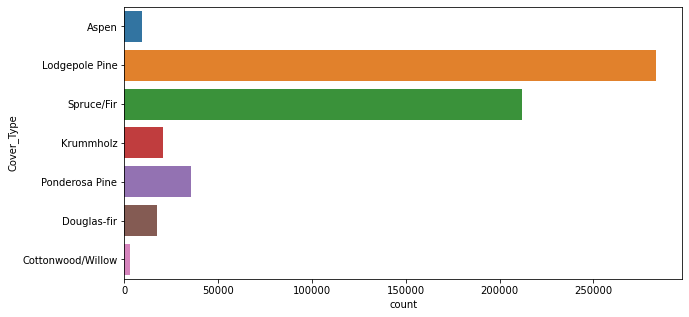

In [8]:
sns.countplot(y='Cover_Type', data=data, orient='h')
plt.show()

> **Observation**
> - `Lodgepole Pine` is most common cover type in dataset whereas `Cottonwood/Willow` is most rare. More than `80` percent of forest lands belong to either `Lodgepole Pine` or `Spruce/Fir` cover type

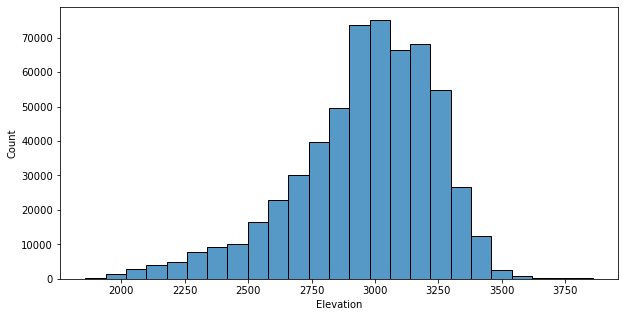

In [9]:
sns.histplot(x='Elevation', data=data, bins=25)
plt.show()

In [10]:
print('Mean :', data['Elevation'].mean())
print('Median :', data['Elevation'].median())

Mean : 2959.365300544567
Median : 2996.0


> **Observation**
> - The distribution of `Elevation` is negatively skewed with the mean less than median

- What is the distribution of Cover_type across different Wilderness_Type ?

In [11]:
pd.crosstab(data['Cover_Type'], data['Wilderness_Type'])

Wilderness_Type,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
Aspen,0,5712,0,3781
Cottonwood/Willow,2747,0,0,0
Douglas-fir,9741,7626,0,0
Krummholz,0,13105,2304,5101
Lodgepole Pine,3026,125093,8985,146197
Ponderosa Pine,21454,14300,0,0
Spruce/Fir,0,87528,18595,105717


> **Observation**
> - There is only `Cache la Poudre` wilderness type found for `Cottonwood/Willow` cover type lands
> - Lands with `Lodgepole Pine` cover type have distribution across all wilderness type
> - `Douglas-fir` and `Ponderosa Pine` cover type lands have similar pattern of wilderness type distribution
> - We can find all wilderness types except `Cache la Poudre` in lands with  `Krummholz` and `Spruce/Fir` cover type 
> - `Comanche Peak` is most common wilderness in lands with `Aspen` and `Krummholz` cover type

- Plot a scatterplot between a pair of Hillshade variable with Cover_Type as hue. What conclusion can you draw from it ?

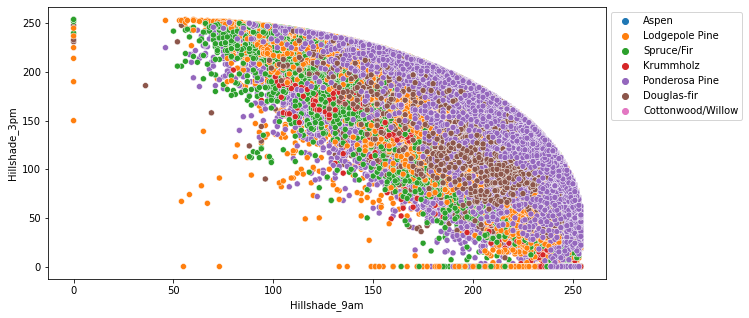

In [12]:
sns.scatterplot(x='Hillshade_9am', y='Hillshade_3pm', data=data, hue='Cover_Type')
plt.legend(bbox_to_anchor=(1, 1)) # place legend outside plot
plt.show()

> **Observation**
> - The hill shade at 9 a.m. and hill shade 3 p.m. when categorized by cover type have negative correlation i.e. when hill shade at 9 am is high, the hill shade at 3 pm is low vice versa

- Determine whether Elevation gives more information about Cover_Type than Horizontal_Distance_To_Hydrology using graphical analysis

In [13]:
# prepare data by binning relevant variables
data['Elevation_Bin'] = pd.cut(data['Elevation'], 5)
data['Hydro_Bin'] = pd.cut(data['Horizontal_Distance_To_Hydrology'], 5)

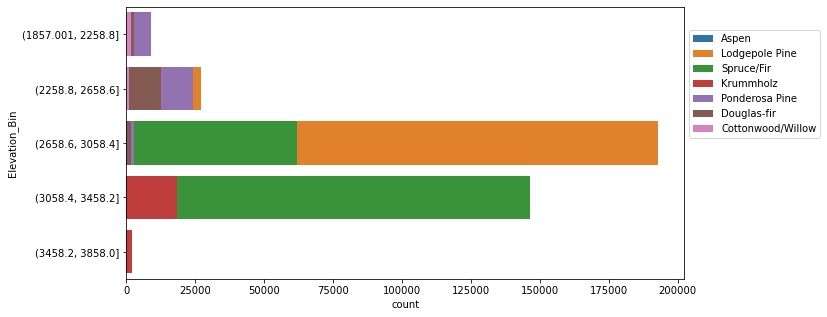

In [14]:
sns.countplot(y='Elevation_Bin', hue='Cover_Type', data=data, dodge=False, orient='h')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

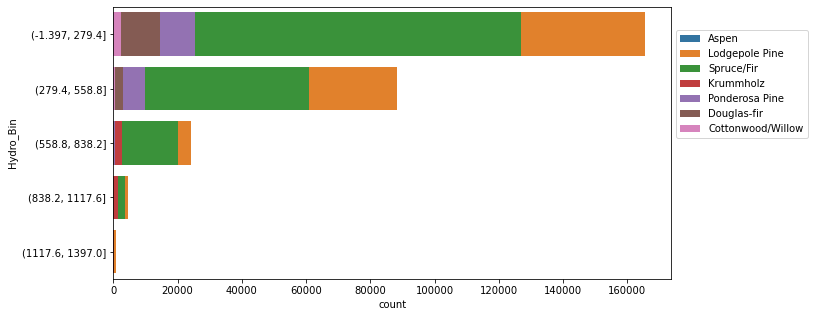

In [15]:
sns.countplot(y='Hydro_Bin', hue='Cover_Type', data=data, dodge=False, orient='h')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

> **Observation**
> - Distribution of `Cover_type` is more dependent on `Elevation_Bin` than binned `Horizontal_Distance_To_Hydrology` because we can see more change in the `Cover_type` distribution as we switch to different `Elevation_Bin`. Thus after splitting into 5 equal width intervals, `Elevation` gives more information about `Cover_Type` than `Horizontal_Distance_To_Hydrology`

- Drop Soil_Type, convert all remaining categorical variables into numerical and determine the correlation coefficient of each pair of variables

In [16]:
dropped = data.drop(columns=['Soil_Type', 'Hydro_Bin', 'Elevation_Bin'])
num_converted = pd.get_dummies(dropped)
corr_mat = num_converted.corr()
corr_mat

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Wilderness_Type_Comanche Peak,Wilderness_Type_Neota,Wilderness_Type_Rawah,Cover_Type_Aspen,Cover_Type_Cottonwood/Willow,Cover_Type_Douglas-fir,Cover_Type_Krummholz,Cover_Type_Lodgepole Pine,Cover_Type_Ponderosa Pine,Cover_Type_Spruce/Fir
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.066550,0.238164,0.131838,-0.079150,-0.181038,-0.338662,0.275039,-0.133892,-0.516612,0.457994
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.074904,0.055988,-0.140123,-0.018856,-0.011404,0.039027,-0.004137,-0.031347,0.047400,0.003259
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,0.125663,-0.036253,-0.234576,0.043675,0.040731,0.115921,0.003889,-0.072066,0.227971,-0.098792
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.122028,0.055726,-0.097124,-0.034607,-0.052692,-0.090492,0.078808,0.048136,-0.071264,0.004017
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.146839,-0.008709,-0.180710,0.009267,-0.006186,-0.002955,0.075655,-0.008946,0.070406,-0.055381
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.232933,-0.200411,0.453913,-0.082687,-0.063473,-0.147809,0.047613,0.049664,-0.230937,0.128590
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,-0.100565,-0.006181,0.201299,0.054541,0.041709,-0.126564,0.034454,0.061889,-0.097834,-0.004167
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.048646,0.042392,0.028728,-0.027922,-0.022040,-0.119792,-0.015218,0.099080,-0.097049,0.004272
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.090757,0.034707,-0.115155,-0.069390,-0.056068,0.026397,-0.037965,0.011602,-0.014459,0.026655
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.277510,0.027473,0.380568,-0.039181,-0.058356,-0.122609,0.012964,0.138394,-0.206787,0.016568


- Create Heatmap from the correlation matrix 

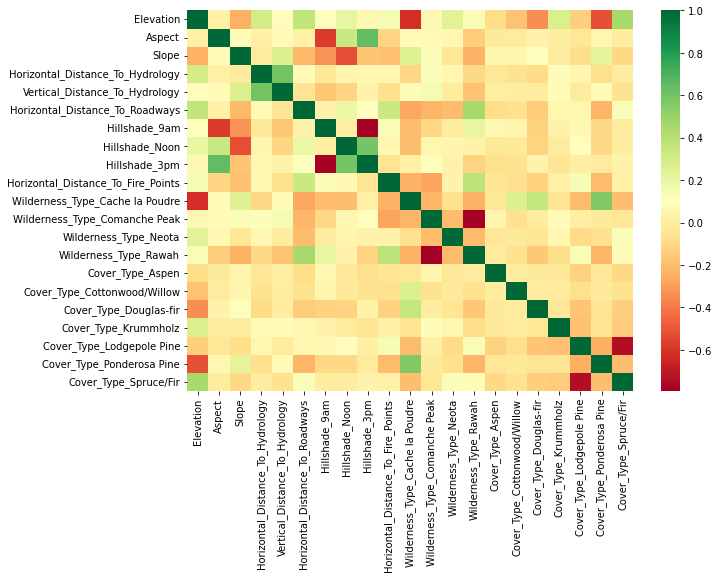

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_mat, cmap='RdYlGn')
plt.show()

- From the correlation matrix, determine the relationship between Krummholz and Cottonwood/Willow to geographical features

> **Observation**
> - `Cover_Type Krummholz` has negative relationship with 
    - Aspect
    - Hillshade_Noon
    - Hillshade_3pm
    - Wilderness_Type_Cache la Poudre
    - Wilderness_Type_Rawah
    - all cover types except itself
> - `Cover_Type Krummholz` has positive relationship with 
    - Elevation
    - Slope
    - Horizontal_Distance_To_Hydrology
    - Vertical_Distance_To_Hydrology
    - Horizontal_Distance_To_Roadways
    - Hillshade_9am
    - Horizontal_Distance_To_Fire_Points
    - Wilderness_Type_Comanche Peak
    - Wilderness_Type_Neota
    - itself
> - `Cover_Type_Cottonwood/Willow` has negative relationship with
    - Elevation
    - Aspect
    - Horizontal_Distance_To_Hydrology
    - Vertical_Distance_To_Hydrology
    - Horizontal_Distance_To_Roadways
    - Hillshade_Noon
    - Hillshade_3pm
    - Horizontal_Distance_To_Fire_Points
    - Wilderness_Type_Comanche Peak
    - Wilderness_Type_Neota
    - Wilderness_Type_Rawah
    - all cover types except itself
> - `Cover_Type_Cottonwood/Willow` has negative relationship with
    - Slope
    - Hillshade_9am
    - Wilderness_Type_Cache la Poudre
    - itself
> - Negative relationship means variables value increase or decrease in opposite direction
> - Positive relationship means one variable increase, another also increase, or one variable decrease, another also decrease
> - In this case, high value for a category (categorical variable) e.g. 1 means observing the category whereas low value of category e.g. 0 means not observing